# Programming Assignment-2
The goal of this assingment is to allow you to practice several the following things in Python:
1. Perfoming typical data processing (or preprocessing if you prefer). This includes all the typical data wraning such as creating news variables, combining several datasets and more 
2. Running explolatory data analysis including basic plotting of variables 
3. Perfoming basic inferential statisticals using statsmodels and scipy to run hypythesis testing and build simple statistial or econometric models.

## Datasets 
For this assignment, you will use the following datasets:
### Rwanda Health Indicators
The Excel file was generated by combining multiple CSV files, each containing data on different health indicators for Rwanda, So that each sheet in the file represent one such indicator. See below some of the input files which were used:
- `access-to-health-care_subnational_rwa`
- `child-mortality-rates_subnational_rwa`
- `dhs-mobile_subnational_rwa`

You can download the dataset from [here](https://docs.google.com/spreadsheets/d/1uvTQYS22VfXXo1Hwkm1frFx_bKkLQkcf/edit?usp=share_link&ouid=113302179168925233984&rtpof=true&sd=true).
### Nights lights Data
- Please download it [here](https://drive.google.com/file/d/1f_4fiqxIejly0YmC088s9bxOfrABv9Sz/view?usp=sharing) and check the documentation in the cells below. 

### Popupation Dataset
- Please download it [here](https://drive.google.com/file/d/1FWEFGdN-xDuFH1jmt0hr4F8Xc3Y5XzvB/view?usp=share_link) and check the documentation and metadata in the class notebooks.


## Submission Guidelines 
- Please guidelines and complete all steps in the [GitHub Workflow](https://dmatekenya.github.io/AIMS-DSCBI/course-requirements/github-workflow.html)
- Once you have completed your assignment, push chanegs to your repository.
- Send a link (copy from within GitHub) to your notebook to the tutors/teaching assistants


# Import Required Packages

In [282]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Input Folders

As usual, it is good practice to set up input folders using the [`pathlib`](https://docs.python.org/3/library/pathlib.html) package. In this section, make sure to define the folders where your data is stored on your machine.

I find it helpful to set up the working directory and input data folders right at the start of the notebook. To keep things organized, I use the naming convention: `FILE_{NAME}` for files and `DIR_{NAME}` for folders. We use capital letters because these are global variables that will be referenced throughout the notebook.

We'll be using the [`pathlib`](https://docs.python.org/3/library/pathlib.html) library, which offers several advantages over traditional string-based path handling:

- **Cross-platform compatibility** - automatically handles path separators (`/` vs `\`) across different operating systems
- **Object-oriented approach** - paths are objects with useful methods rather than strings
- **Intuitive syntax** - use `/` operator to join paths naturally: `parent_dir / "subfolder" / "file.txt"`
- **Built-in path operations** - methods like `.exists()`, `.is_file()`, `.parent`, `.stem`, and `.suffix`
- **Safer path manipulation** - reduces errors from manual string concatenation and splitting

This is the recommended approach for managing file paths in modern Python development.


In [67]:
# Uncomment the following lines and add your code to define the directories and files
DIR_DATA = Path.cwd().parents[1].joinpath("data")
FILE_EXCEL = DIR_DATA/"RW-Health-Data.xlsx"
# Population by enumeration area (EA) for Rwanda
FILE_POP_CELL = DIR_DATA/"rwa-cell-pop.csv"
FILE_CELL_NTL = DIR_DATA/"cell-ntl-2015-2020-2024.csv"
DIR_DATA

PosixPath('/home/ira2351696/Desktop/AIMS-DSCBI/data')

# Part 1: Processing Excel Files
The primary goal is to preprocess an [Excel file](https://docs.google.com/spreadsheets/d/1uvTQYS22VfXXo1Hwkm1frFx_bKkLQkcf/edit?usp=share_link&ouid=113302179168925233984&rtpof=true&sd=true) with multiple sheets into a unified CSV dataset that consolidates multiple indicators. Having all indicators in a single file at the same analytical unit (national, subnational) is more efficient than managing separate files and enables easier cross-indicator analysis.

## Task 1: Generate National-Level Summaries

For each indicator, compute a single national-level value using appropriate aggregation functions such as **mean**, **sum** or **count**. For this one, all available indicators can be summarized at national level, so we will have a CSV file with one row and 

### Expected Output Structure
1. **DataFrame display** in Jupyter Notebook
2. **CSV file** with columns:
- `indicator_name`: Name of the indicator
- `aggregated_value`: Computed national value
- `indicator_year`: Survey year or something similar
- `survey_name`: Name of the survey where information is coming from
- `aggregation_method`: Statistical method used (optional)

## Task 2: Subnational-Level Indicator Dataset

Create a merged dataset for indicators with subnational data (ADM2/ADM3 levels), ensuring spatial alignment and consistent administrative boundaries.

### Expected Output Structure
   - `indicator_name`: Name of the indicator
   - `aggregated_value`: Computed national value
   - `indicator_year`: Survey year or something similar
   - `survey_name`: Name of the survey where information is coming from
   - `aggregation_method`: Statistical method used (optional)

This structure enables both single-indicator and multi-indicator analysis at the subnational level.

In [ ]:
# Load Excel File
# Load the Excel file with all population sheets
all_pop_sheets = pd.read_excel(FILE_EXCEL, sheet_name=None,skiprows=[1])

# Add sheet name as a column before concatenating
df_list = []
for sheet_name, df in all_pop_sheets.items():
    df["survey_name"] = sheet_name
    df_list.append(df)

df_combined_indicators = pd.concat(df_list, ignore_index=True)
df_combined_indicators.head()

,ISO3,Location,DataId,Indicator,Value,Precision,DHS_CountryCode,CountryName,SurveyYear,SurveyId,...,SDRID,RegionId,SurveyYearLabel,SurveyType,DenominatorWeighted,DenominatorUnweighted,CILow,CIHigh,LevelRank,survey_name
0,RWA,Butare/Gitarama,1042036,Total fertility rate 15-49,5.2,1,RW,Rwanda,1992,RW1992DHS,...,FEFRTRWTFR,RWDHS1992442006,1992,DHS,NaN,NaN,NaN,NaN,1.0,dhs-mobile_subnational_rwa
1,RWA,Butare,1054424,Total fertility rate 15-49,4.8,1,RW,Rwanda,1992,RW1992DHS,...,FEFRTRWTFR,RWDHS1992442007,1992,DHS,NaN,NaN,NaN,NaN,NaN,dhs-mobile_subnational_rwa
2,RWA,Gitarama,7453122,Total fertility rate 15-49,5.5,1,RW,Rwanda,1992,RW1992DHS,...,FEFRTRWTFR,RWDHS1992442008,1992,DHS,NaN,NaN,NaN,NaN,NaN,dhs-mobile_subnational_rwa
3,RWA,Byumba/Kibungo,1054417,Total fertility rate 15-49,6.4,1,RW,Rwanda,1992,RW1992DHS,...,FEFRTRWTFR,RWDHS1992442009,1992,DHS,NaN,NaN,NaN,NaN,1.0,dhs-mobile_subnational_rwa
4,RWA,Byumba,1042073,Total fertility rate 15-49,6.2,1,RW,Rwanda,1992,RW1992DHS,...,FEFRTRWTFR,RWDHS1992442010,1992,DHS,NaN,NaN,NaN,NaN,NaN,dhs-mobile_subnational_rwa


## Task 1: Generate National-Level Summaries

In [ ]:
df_national_indicators = (
    df_combined_indicators.groupby(["survey_name", "Indicator", "SurveyYear"])
    .agg({"Value": "mean"})
    .reset_index()
    .rename(
        columns={
            "Value": "aggregated_value",
            "Indicator": "indicator_name",
            "SurveyYear": "indicator_year",
        }
    )
)
df_national_indicators["aggregation_method"] = "mean"
df_national_indicators.to_csv(
    DIR_DATA / "pop_national_indicators_file.csv", index=False
)

## Task 2: Subnational-Level Indicator Dataset

In [237]:
df_subnational_indicators = (
    df_combined_indicators.groupby(["Location","survey_name", "Indicator", "SurveyYear"])
    .agg({"Value": "mean"})
    .reset_index()
    .rename(
        columns={
            "Value": "aggregated_value",
            "Indicator": "indicator_name",
            "SurveyYear": "indicator_year",
        }
    )
)
df_subnational_indicators["aggregation_method"] = "mean"
df_subnational_indicators.to_csv(
    DIR_DATA / "pop_subnational_indicators_file.csv", index=False
)
print(df_subnational_indicators.shape)

(13348, 6)


## Introduction to Nightlights Dataset

## What is Nightlight Data?

Nightlight data is satellite imagery capturing artificial light emissions from Earth's surface during nighttime. Satellites like VIIRS collect this data regularly, providing an **objective, real-time measure of human economic activity and development**.

### Raw Data: Radiance Measurements
The fundamental measurement in nightlight data is **radiance** - the amount of light energy detected by satellite sensors, measured in **nanowatts per square centimeter per steradian (nW/cm²/sr)**. Each pixel in satellite imagery contains a radiance value representing the light intensity from that specific location on Earth's surface.

### Annual Composite Generation
This dataset was created from **annual composite images** using VIIRS nightlight files for Rwanda. Annual composites are generated by:

- **Aggregating daily/monthly observations** throughout each year (2015, 2020, 2024)
- **Filtering out temporary light sources** (fires, lightning, aurora)
- **Removing cloud-affected observations** to ensure clear measurements
- **Averaging or taking median values** to create stable, representative annual measurements
- **Masking techniques** to exclude areas with unreliable data

The files used include both **average composites** (`average_masked`) and **median composites** (`median_masked`), with **cloud-free versions** (`vcmslcfg`) preferred over cloud-inclusive versions (`vcmcfg`) for more accurate measurements.

### Why Use Nightlight Data?

- **Consistent global coverage** - Available everywhere, regardless of local data quality
- **Real-time updates** - More current than traditional economic statistics
- **Objective measurement** - Not subject to reporting biases
- **High resolution** - Captures local development patterns
- **Proxy for development** - Light intensity correlates with economic activity, infrastructure, and quality of life

## Dataset Overview 

- **6,507 observations** across Rwanda's administrative cells
- **Three time periods**: 2015, 2020, 2024
- **Cell-level data** - Rwanda's smallest administrative units
- Allows temporal analysis of development trends

---

## Variable Definitions

### Administrative Identifiers
- **`cell_id`** - Unique identifier for linking with other datasets
- **`province_name`** - Province (5 total in Rwanda)
- **`district_name`** - District (30 total in Rwanda) 
- **`sector_name`** - Administrative level between district and cell
- **`cell_name`** - Specific cell name

### Core Nightlight Measurements

#### `total_nightlight`
- **Sum of all radiance values** within cell boundaries
- **Key indicator** of overall economic activity/development
- Higher values = more total development

#### `mean_nightlight` 
- **Average radiance** per pixel
- Indicates development intensity regardless of cell size
- Useful for comparing cells of different areas

#### `median_nightlight`
- **Middle radiance value** of all pixels (less sensitive to outliers)
- Better represents typical lighting in unevenly developed areas

#### `max_nightlight`
- **Highest radiance** within cell
- Indicates major infrastructure (hospitals, commercial centers)

#### `min_nightlight` & `std_nightlight`
- Minimum radiance and standard deviation
- High std = uneven development within cell

### Spatial Coverage Indicators

#### `pixel_count`
- **Total pixels** in cell (indicates geographic size)
- Used to normalize other measurements

#### `lit_pixel_count`
- **Number of pixels with detectable light** (radiance > 0)
- Shows spatial extent of development

#### `lit_pixel_percentage`
- **Percentage of cell area with lighting**
- Formula: `(lit_pixel_count ÷ pixel_count) × 100`
- **0% = completely dark, 100% = fully developed**

#### `year`
- Time period: 2015, 2020, or 2024

# Part-2: Demographic and Nightlights Data

## Part A: Varible Generation and Data Integration

### Population Dataset Variables (`rwa-cell-pop.csv`):
Create the following derived variables:
- **`dependency_ratio`** - `(children_under_five_2020 + elderly_60_plus_2020) / working_age_population * 100`
- **`people_per_building`** - `general_2020 / building_count`
- **`working_age_population`** - `general_2020 - children_under_five_2020 - elderly_60_plus_2020`
- **`infrastructure_index`** - Your own formula that incorporates `people_per_building` and other relevant variables to measure infrastructure adequacy. Document and justify your `infrastructure_index` methodology, explaining how `people_per_building` and other variables contribute to measuring infrastructure pressure.

### Nightlight Dataset Variables (`cell-ntl-2015-2020-2024.csv`):
Create the following temporal and development indicators:
- **`nightlight_change_2015_2024`** - Percentage change in total nightlight from 2015 to 2024
- **`mean_nightlight_change_2015_2024`** - Percentage change in mean nightlight from 2015 to 2024
- **`lit_pixel_percentage`** - Use existing or calculate: `(lit_pixel_count / pixel_count) * 100`

### Data Integration:
Merge the datasets using the appropriate column. 

## Part B: Exploratory Data Analysis

### Correlation Analysis:
1. **Correlation Heatmap**: Create a heatmap showing correlations between 10 key variables (mix of demographic, infrastructure, and nightlight variables). 
2. **Report the top 3 variable pairs** with the highest correlations and interpret their relationships.
3. **Identify unexpected correlations** and discuss potential explanations.

### Nightlight Trend Analysis:
1. **District Ranking**: Report the **top 5 districts** with the highest nightlight growth (2015-2024) and **bottom 5 districts** with the most decline or lowest growth.
2. **Lit Pixel Analysis**: Compare these districts using `lit_pixel_percentage` changes to understand whether growth represents intensification or spatial expansion.
3. **Create visualizations** showing nightlight trends for these extreme districts.

## Part C: Modeling

### Multivariate Linear Regression:
1. **Model Development**: Build a multivariate linear regression model predicting **population density** using both demographic and nightlight variables as predictors. Explore as many variables as possible at the beginning.
2. **Variable Selection**: Test different combinations of variables and report the **top 3 most predictive variables** of population density.
3. **Model Evaluation**: Report R-squared, coefficients, and statistical significance. Interpret what these results tell us about population-infrastructure relationships.



## Notes and Other Requirements
Please follow the genral guidelines below when preparing your analysis..

### Statistical Analysis:
- Properly handle missing data and outliers
- Use appropriate statistical tests and report p-values
- Calculate and interpret correlation coefficients
- Validate regression assumptions (normality, homoscedasticity)

### Data Management:
- Document all data cleaning and aggregation steps using markdown 
- Ensure consistent district naming across datasets

### Visualization Standards:
- Create clear, publication-quality heatmaps with appropriate color scales
- Design effective time series plots for nightlight trends
- Include proper axis labels, titles, and legends
- Use consistent formatting across all visualizations

### Reporting Requirements:
- Clearly state the top 3 most predictive variables with statistical justification
- Provide ranked lists for nightlight growth districts with supporting metrics
- Include model performance statistics and interpretation
- Document all methodological choices and assumptions

# Read Datasets

In [267]:
df_pop_cell = pd.read_csv(FILE_POP_CELL)
df_cell_ntl = pd.read_csv(FILE_CELL_NTL)

# Part A: Feature Engineering and Data Integration 

## Population Dataset Variables (`rwa-cell-pop.csv`)

In [4]:
# Checking missing values
df_pop_cell.isna().sum()

cell_id                     0
province_name               0
district_name               0
sector_name                 0
cell_name                   0
elderly_60_plus_2020        0
general_2020                0
children_under_five_2020    0
youth_15_24_2020            0
men_2020                    0
women_2020                  0
building_count              0
dtype: int64

`There is no missing values in population dataset`

In [8]:
df_pop_cell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cell_id                   2169 non-null   object 
 1   province_name             2169 non-null   object 
 2   district_name             2169 non-null   object 
 3   sector_name               2169 non-null   object 
 4   cell_name                 2169 non-null   object 
 5   elderly_60_plus_2020      2169 non-null   float64
 6   general_2020              2169 non-null   float64
 7   children_under_five_2020  2169 non-null   float64
 8   youth_15_24_2020          2169 non-null   float64
 9   men_2020                  2169 non-null   float64
 10  women_2020                2169 non-null   float64
 11  building_count            2169 non-null   float64
dtypes: float64(7), object(5)
memory usage: 203.5+ KB


In [24]:
df_pop_cell.columns

Index(['cell_id', 'province_name', 'district_name', 'sector_name', 'cell_name',
       'elderly_60_plus_2020', 'general_2020', 'children_under_five_2020',
       'youth_15_24_2020', 'men_2020', 'women_2020', 'building_count'],
      dtype='object')

In [10]:
df_pop_cell.describe().T

,count,mean,std,min,25%,50%,75%,max
elderly_60_plus_2020,2169.0,282.050886,156.458789,0.343052,181.390900,254.721059,349.359092,1470.996969
general_2020,2169.0,5960.321816,4293.644248,6.660364,3451.956438,4982.332329,7076.692059,70171.206243
children_under_five_2020,2169.0,881.959597,655.958947,0.906928,480.750345,729.092652,1075.264887,10356.845341
youth_15_24_2020,2169.0,1214.862984,980.263466,1.382110,691.862254,985.438572,1422.111063,17588.081467
men_2020,2169.0,2879.674871,2196.665487,3.125891,1634.181998,2363.863004,3380.282565,37017.918522
women_2020,2169.0,3080.646953,2107.219835,3.534472,1807.983951,2605.450200,3705.960666,33153.290047
building_count,2169.0,1247.158137,852.285029,0.000000,714.000000,1027.000000,1512.000000,9168.000000


In [11]:
df_pop_cell.shape

(2169, 12)

In [7]:
df_pop_cell.province_name.nunique()

5

Create the following derived variables:
- **`dependency_ratio`** - `(children_under_five_2020 + elderly_60_plus_2020) / working_age_population * 100`
- **`people_per_building`** - `general_2020 / building_count`
- **`working_age_population`** - `general_2020 - children_under_five_2020 - elderly_60_plus_2020`
- **`infrastructure_index`** - Your own formula that incorporates `people_per_building` and other relevant variables to measure infrastructure adequacy

In [249]:
def features_engineer_population(df):
    df = df.copy()
    # working_age_population
    df["working_age_population"] = (
        df.general_2020 - df.children_under_five_2020 - df.elderly_60_plus_2020
    )
    # dependency_ratio
    df["dependency_ratio"] = (np.where(df.working_age_population!=0,((df.children_under_five_2020 + df.elderly_60_plus_2020) / df.working_age_population) * 100,0)
        
    )
    # people_per_building
    df["people_per_building"] = np.where(df.building_count!=0,df.general_2020 / df.building_count,0)

    # Support ratio (inverse)
    df['support_ratio'] = np.where(df['dependency_ratio'] != 0, 1 / df['dependency_ratio'], 0)
    # Buildings per dependent
    df['building_per_dependent'] = df.building_count / (df.children_under_five_2020 + df.elderly_60_plus_2020)

    # Working-age per building
    df['working_age_per_building'] = np.where(
        df.building_count != 0,
        df.working_age_population / df.building_count,
        0
    )
    # dependent population rate (children + elderly)
    df['dependent_rate'] = np.where(df.general_2020!=0,
        (df.children_under_five_2020 + df.elderly_60_plus_2020 )/ df.general_2020,0
    )
    # Youth rate (population aged 15–24)
    df["youth_rate"] = np.where(
        df.general_2020 != 0, df.youth_15_24_2020 / df.general_2020
        ,0)
    # Support ratio (inverse of dependency ratio)
    df["support_ratio"] = np.where(
        df.dependency_ratio != 0, 1 / df["dependency_ratio"], 0
    )

    #  Normalize variables

    scaler = MinMaxScaler()

    # Positive variables (higher = better)
    cols_positive = ['support_ratio', 'building_per_dependent', 'working_age_per_building']

    # Negative variables (higher = worse; need inversion)
    cols_negative = ["people_per_building", "dependent_rate", "youth_rate"]

    # Normalize positive variables
    df[[c + '_norm' for c in cols_positive]] = scaler.fit_transform(df[cols_positive])

    # Normalize negative variables and invert (1 - scaled value)
    df[[c + '_norm' for c in cols_negative]] = 1 - scaler.fit_transform(df[cols_negative])

    # Compute infrastructure_index

    # Combine all normalized variables into a single index
    all_norm_vars = [c + '_norm' for c in cols_positive + cols_negative]

    df['infrastructure_index'] = df[all_norm_vars].mean(axis=1)

    # Interpretation
    # - Index ~1 -> infrastructure is adequate (low crowding, enough buildings, manageable dependency)
    # - Index ~0 -> infrastructure is stressed (high crowding, low building availability, high dependency)
    df = df.drop(columns=[col for col in df.columns if "_norm" in col])

    return df

df_featured_pop_cell = features_engineer_population(df_pop_cell)
df_featured_pop_cell.head()

,cell_id,province_name,district_name,sector_name,cell_name,elderly_60_plus_2020,general_2020,children_under_five_2020,youth_15_24_2020,men_2020,...,building_count,working_age_population,dependency_ratio,people_per_building,support_ratio,building_per_dependent,working_age_per_building,dependent_rate,youth_rate,infrastructure_index
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,...,1435.0,3118.507497,23.636816,2.686846,0.042307,1.946777,2.173176,0.191179,0.196620,0.427754
1,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,...,884.0,2968.862111,23.587041,4.150598,0.042396,1.262376,3.358441,0.190854,0.196476,0.411536
2,RWA.1.1.1.3_1,Amajyaruguru,Burera,Bungwe,Mudugari,109.718616,1756.630395,225.188715,345.073314,843.263769,...,530.0,1421.723064,23.556439,3.314397,0.042451,1.582527,2.682496,0.190653,0.196440,0.420071
3,RWA.1.1.1.4_1,Amajyaruguru,Burera,Bungwe,Tumba,318.065743,5174.177333,666.434701,1016.066328,2482.353880,...,1512.0,4189.676889,23.498243,3.422075,0.042556,1.535804,2.770950,0.190272,0.196373,0.419895
4,RWA.1.1.2.1_1,Amajyaruguru,Burera,Butaro,Gatsibo,335.976866,6046.478580,833.994018,1264.716616,2880.475354,...,2036.0,4876.507696,23.991983,2.969783,0.041681,1.740214,2.395141,0.193496,0.209166,0.400835


## Nightlight Dataset Variables (`cell-ntl-2015-2020-2024.csv`)

In [19]:
# Checking missing values
df_cell_ntl.isna().sum()

cell_id                 0
prov_name               0
dist_name               0
sect_name               0
province_name           0
district_name           0
sector_name             0
cell_name               0
total_nightlight        0
mean_nightlight         0
median_nightlight       0
max_nightlight          0
min_nightlight          0
std_nightlight          0
pixel_count             0
lit_pixel_count         0
year                    0
lit_pixel_percentage    0
dtype: int64

In [20]:
df_cell_ntl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6507 entries, 0 to 6506
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cell_id               6507 non-null   object 
 1   prov_name             6507 non-null   object 
 2   dist_name             6507 non-null   object 
 3   sect_name             6507 non-null   object 
 4   province_name         6507 non-null   object 
 5   district_name         6507 non-null   object 
 6   sector_name           6507 non-null   object 
 7   cell_name             6507 non-null   object 
 8   total_nightlight      6507 non-null   float64
 9   mean_nightlight       6507 non-null   float64
 10  median_nightlight     6507 non-null   float64
 11  max_nightlight        6507 non-null   float64
 12  min_nightlight        6507 non-null   float64
 13  std_nightlight        6507 non-null   float64
 14  pixel_count           6507 non-null   int64  
 15  lit_pixel_count      

In [23]:
df_cell_ntl.columns

Index(['cell_id', 'prov_name', 'dist_name', 'sect_name', 'province_name',
       'district_name', 'sector_name', 'cell_name', 'total_nightlight',
       'mean_nightlight', 'median_nightlight', 'max_nightlight',
       'min_nightlight', 'std_nightlight', 'pixel_count', 'lit_pixel_count',
       'year', 'lit_pixel_percentage'],
      dtype='object')

In [30]:
df_cell_ntl[['prov_name','province_name']].head(10)

,prov_name,province_name
0,Amajyaruguru,Unknown_Province
1,Amajyaruguru,Unknown_Province
2,Amajyaruguru,Unknown_Province
3,Amajyaruguru,Unknown_Province
4,Amajyaruguru,Unknown_Province
5,Amajyaruguru,Unknown_Province
6,Amajyaruguru,Unknown_Province
7,Amajyaruguru,Unknown_Province
8,Amajyaruguru,Unknown_Province
9,Amajyaruguru,Unknown_Province


In [41]:
print(df_cell_ntl.prov_name.value_counts())
print("Number of Province from prov_name is ",df_cell_ntl.prov_name.nunique())
print(df_cell_ntl.province_name.value_counts())
print("Number of Province from province_name is ",df_cell_ntl.province_name.nunique())

prov_name
Iburengerazuba    1650
Amajyepfo         1605
Iburasirazuba     1521
Amajyaruguru      1248
UmujyiwaKigali     483
Name: count, dtype: int64
Number of Province from prov_name is  5
province_name
Unknown_Province    6507
Name: count, dtype: int64
Number of Province from province_name is  1


In [43]:
print(df_cell_ntl.sect_name.value_counts())
print("Number of Sectors from sect_name is ",df_cell_ntl.sect_name.nunique())
print(df_cell_ntl.sector_name.value_counts())
print("Number of Sectors from sector_name is ",df_cell_ntl.sector_name.nunique())

sect_name
Remera      57
Karama      48
Kageyo      45
Ruhango     42
Ngoma       42
            ..
Mataba       9
Kacyiru      9
Gatsata      9
Gisozi       6
Rudashya     3
Name: count, Length: 381, dtype: int64
Number of Sectors from sect_name is  381
sector_name
Unknown_Sector    6507
Name: count, dtype: int64
Number of Sectors from sector_name is  1


In [44]:
print(df_cell_ntl.dist_name.value_counts())
print("Number of Districts from dist_name are ",df_cell_ntl.dist_name.nunique())
print(df_cell_ntl.district_name.value_counts())
print("Number of Districts from district_name are ",df_cell_ntl.district_name.nunique())

dist_name
Gicumbi       327
Nyagatare     318
Gakenke       291
Rusizi        285
Nyamagabe     276
Karongi       267
Rwamagana     246
Rubavu        243
Huye          240
Ngororero     228
Nyabihu       225
Rulindo       219
Gasabo        219
Bugesera      216
Nyaruguru     216
Gatsibo       213
Nyamasheke    207
Burera        207
Musanze       204
Rutsiro       195
Ngoma         192
Muhanga       189
Kirehe        180
Ruhango       177
Kamonyi       177
Gisagara      177
Kayonza       156
Nyanza        153
Nyarugenge    141
Kicukiro      123
Name: count, dtype: int64
Number of Districts from dist_name are  30
district_name
Unknown_District    6507
Name: count, dtype: int64
Number of Districts from district_name are  1



Create the following temporal and development indicators:
- **`nightlight_change_2015_2024`** - Percentage change in total nightlight from 2015 to 2024
- **`mean_nightlight_change_2015_2024`** - Percentage change in mean nightlight from 2015 to 2024
- **`lit_pixel_percentage`** - Use existing or calculate: `(lit_pixel_count / pixel_count) * 100`

In [268]:
def features_engineer_nightlight(df):
    df = df.copy()

    # compute lit_pixel_percentage 
    df["lit_pixel_percentage"] = np.where(
        df.pixel_count != 0, (df.lit_pixel_count / df.pixel_count) * 100, 0
    )

    # Keep only years 2015 and 2024
    df = df[df["year"].isin([2015, 2024])]

    # Pivot table to get 2015 and 2024 values per cell
    nightlight_pivot = df.pivot_table(
        index="cell_id", columns="year", values=["total_nightlight", "mean_nightlight"]
    )

    # Flatten multi-index columns
    nightlight_pivot.columns = [
        f"{val}_{year}" for val, year in nightlight_pivot.columns
    ]

    # Calculate percentage change from 2015 to 2024
    nightlight_pivot["nightlight_change_2015_2024"] = np.where(
        nightlight_pivot["total_nightlight_2015"] != 0,
        (
            (
                nightlight_pivot["total_nightlight_2024"]
                - nightlight_pivot["total_nightlight_2015"]
            )
            / nightlight_pivot["total_nightlight_2015"]
        )
        * 100,
        0,
    )

    nightlight_pivot["mean_nightlight_change_2015_2024"] = np.where(
        nightlight_pivot["mean_nightlight_2015"] != 0,
        (
            (
                nightlight_pivot["mean_nightlight_2024"]
                - nightlight_pivot["mean_nightlight_2015"]
            )
            / nightlight_pivot["mean_nightlight_2015"]
        )
        * 100,
        0,
    )

    # Merge back to the original dataframe
    df = df.merge(
        nightlight_pivot[
            ["nightlight_change_2015_2024", "mean_nightlight_change_2015_2024"]
        ],
        left_on="cell_id",
        right_index=True,
        how="left",
    )

    return df
df_featured_cell_ntl = features_engineer_nightlight(df_cell_ntl)
drop_columns = ['province_name',
       'district_name', 'sector_name']
df_featured_cell_ntl = df_featured_cell_ntl.drop(columns=drop_columns)
df_featured_cell_ntl.head()

,cell_id,prov_name,dist_name,sect_name,cell_name,total_nightlight,mean_nightlight,median_nightlight,max_nightlight,min_nightlight,std_nightlight,pixel_count,lit_pixel_count,year,lit_pixel_percentage,nightlight_change_2015_2024,mean_nightlight_change_2015_2024
1,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,11.608531,0.165836,0.0,0.586523,0.0,0.218413,70,26,2024,37.142857,510.862720,510.862733
2,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,1.900350,0.027148,0.0,0.142328,0.0,0.038462,70,26,2015,37.142857,510.862720,510.862733
4,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,10.771848,0.170982,0.0,0.463222,0.0,0.198171,63,27,2024,42.857143,601.012355,601.012330
5,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,1.536613,0.024391,0.0,0.105445,0.0,0.030171,63,27,2015,42.857143,601.012355,601.012330
7,RWA.1.1.1.3_1,Amajyaruguru,Burera,Bungwe,Mudugari,10.102386,0.168373,0.0,0.430385,0.0,0.193181,60,26,2024,43.333333,599.043610,599.043614


In [269]:
df_featured_cell_ntl.shape

(4338, 17)

In [ ]:
#checking missing values
df_featured_cell_ntl.isna().sum()

cell_id                             0
prov_name                           0
dist_name                           0
sect_name                           0
cell_name                           0
total_nightlight                    0
mean_nightlight                     0
median_nightlight                   0
max_nightlight                      0
min_nightlight                      0
std_nightlight                      0
pixel_count                         0
lit_pixel_count                     0
year                                0
lit_pixel_percentage                0
nightlight_change_2015_2024         0
mean_nightlight_change_2015_2024    0
dtype: int64

`There is no missing values`

## Data Integration:
Merge the datasets using `cell_id` and aggregate to **district level** for analysis. Handle missing data appropriately and document your approach.

In [308]:
def data_integration(df_pop, df_ntl):
    df = df_pop.merge(df_ntl, on="cell_id", how="inner")

    # Aggregate to district level
    data = (
        df.groupby("district_name")
        .agg(
            # Population counts -> sum
            general_2020=("general_2020", "sum"),
            children_under_five_2020=("children_under_five_2020", "sum"),
            elderly_60_plus_2020=("elderly_60_plus_2020", "sum"),
            youth_15_24_2020=("youth_15_24_2020", "sum"),
            men_2020=("men_2020", "sum"),
            women_2020=("women_2020", "sum"),
            building_count=("building_count", "sum"),
            working_age_population=("working_age_population", "sum"),
            # Ratios -> population-weighted mean
            dependency_ratio=(
                "dependency_ratio",
                lambda x: (x * df.loc[x.index, "working_age_population"]).sum()
                / df.loc[x.index, "working_age_population"].sum(),
            ),
            people_per_building=("people_per_building", "mean"),
            dependent_rate=("dependent_rate", "mean"),
            youth_rate=("youth_rate", "mean"),
            support_ratio=("support_ratio", "mean"),
            building_per_dependent=("building_per_dependent", "mean"),
            working_age_per_building=("working_age_per_building", "mean"),
            infrastructure_index=("infrastructure_index", "mean"),
            # Nightlight -> sum or mean
            total_nightlight=("total_nightlight", "sum"),
            mean_nightlight=("mean_nightlight", "mean"),
            lit_pixel_percentage=("lit_pixel_percentage", "mean"),
            nightlight_change_2015_2024=("nightlight_change_2015_2024", "mean"),
            mean_nightlight_change_2015_2024=(
                "mean_nightlight_change_2015_2024",
                "mean",
            ),
        )
        .reset_index()
    )

    return data

data = data_integration(df_featured_pop_cell, df_featured_cell_ntl)
data

,district_name,general_2020,children_under_five_2020,elderly_60_plus_2020,youth_15_24_2020,men_2020,women_2020,building_count,working_age_population,dependency_ratio,...,youth_rate,support_ratio,building_per_dependent,working_age_per_building,infrastructure_index,total_nightlight,mean_nightlight,lit_pixel_percentage,nightlight_change_2015_2024,mean_nightlight_change_2015_2024
0,Bugesera,9.092117e+05,149557.648354,41380.450888,176263.280980,444039.591086,465172.111982,318334.0,7.182736e+05,26.582920,...,0.191118,0.037605,1.595386,2.623313,0.382771,6068.302753,0.213737,43.883068,716.347835,716.347835
1,Burera,6.958934e+05,95371.574766,38381.471322,147743.036032,331772.416124,364120.957286,175916.0,5.621403e+05,23.793533,...,0.212567,0.042534,1.463714,3.247193,0.396491,1511.860759,0.107924,41.877985,584.887420,584.887415
2,Gakenke,6.692357e+05,87400.020162,40951.492402,131969.157956,315375.620270,353860.079526,152872.0,5.408842e+05,23.729944,...,0.195975,0.042174,1.241488,3.590701,0.409530,1879.278319,0.118181,41.522959,447.190912,447.190912
3,Gasabo,1.670178e+06,246883.715090,43805.483258,386286.220272,866684.091400,803493.869798,326358.0,1.379489e+06,21.072241,...,0.219247,0.045458,1.324792,4.197159,0.401232,15161.309973,2.227290,38.504546,410.918378,410.918378
4,Gatsibo,1.235875e+06,189996.686058,55265.371886,245033.384810,594414.931544,641460.038318,203460.0,9.906129e+05,24.758616,...,0.196573,0.040415,0.926619,5.025326,0.385140,4623.080505,0.127541,42.005900,579.619920,579.619922
5,Gicumbi,8.834072e+05,115884.002890,49467.131788,180498.116442,421495.372104,461911.771332,212498.0,7.180560e+05,23.027609,...,0.203044,0.043131,1.354798,3.415135,0.411044,2761.249195,0.137145,38.294289,569.380308,569.380308
6,Gisagara,7.333018e+05,120069.345642,36483.784970,134058.910174,342251.046780,391050.683694,144570.0,5.767486e+05,27.144084,...,0.183620,0.037065,0.959921,4.063222,0.370702,2249.729131,0.165821,44.168324,539.816960,539.816967
7,Huye,7.504436e+05,106517.425812,43683.383022,148356.786966,359746.647048,390696.984990,168880.0,6.002428e+05,25.023342,...,0.195820,0.039830,1.151750,3.616482,0.385411,2959.238817,0.259462,40.839046,432.024185,432.024183
8,Kamonyi,8.169769e+05,115649.744604,43800.541018,152248.116882,389664.742896,427312.139126,177850.0,6.575266e+05,24.250012,...,0.186375,0.041321,1.087764,4.351361,0.410703,2916.248513,0.218347,44.841924,453.563094,453.563092
9,Karongi,7.189950e+05,104117.253034,39892.640108,144929.263666,338423.879674,380571.140976,153846.0,5.749851e+05,25.045846,...,0.201389,0.039679,1.078121,3.984588,0.375700,2913.170559,0.155299,39.441207,501.861174,501.861174


In [281]:
data.isna().sum()

district_name                       0
general_2020                        0
children_under_five_2020            0
elderly_60_plus_2020                0
youth_15_24_2020                    0
men_2020                            0
women_2020                          0
building_count                      0
working_age_population              0
dependency_ratio                    0
people_per_building                 0
dependent_rate                      0
youth_rate                          0
support_ratio                       0
building_per_dependent              0
working_age_per_building            0
infrastructure_index                0
total_nightlight                    0
mean_nightlight                     0
lit_pixel_percentage                0
nightlight_change_2015_2024         0
mean_nightlight_change_2015_2024    0
dtype: int64

`Data aggregated on district level has no missing values`

### Check Outliers

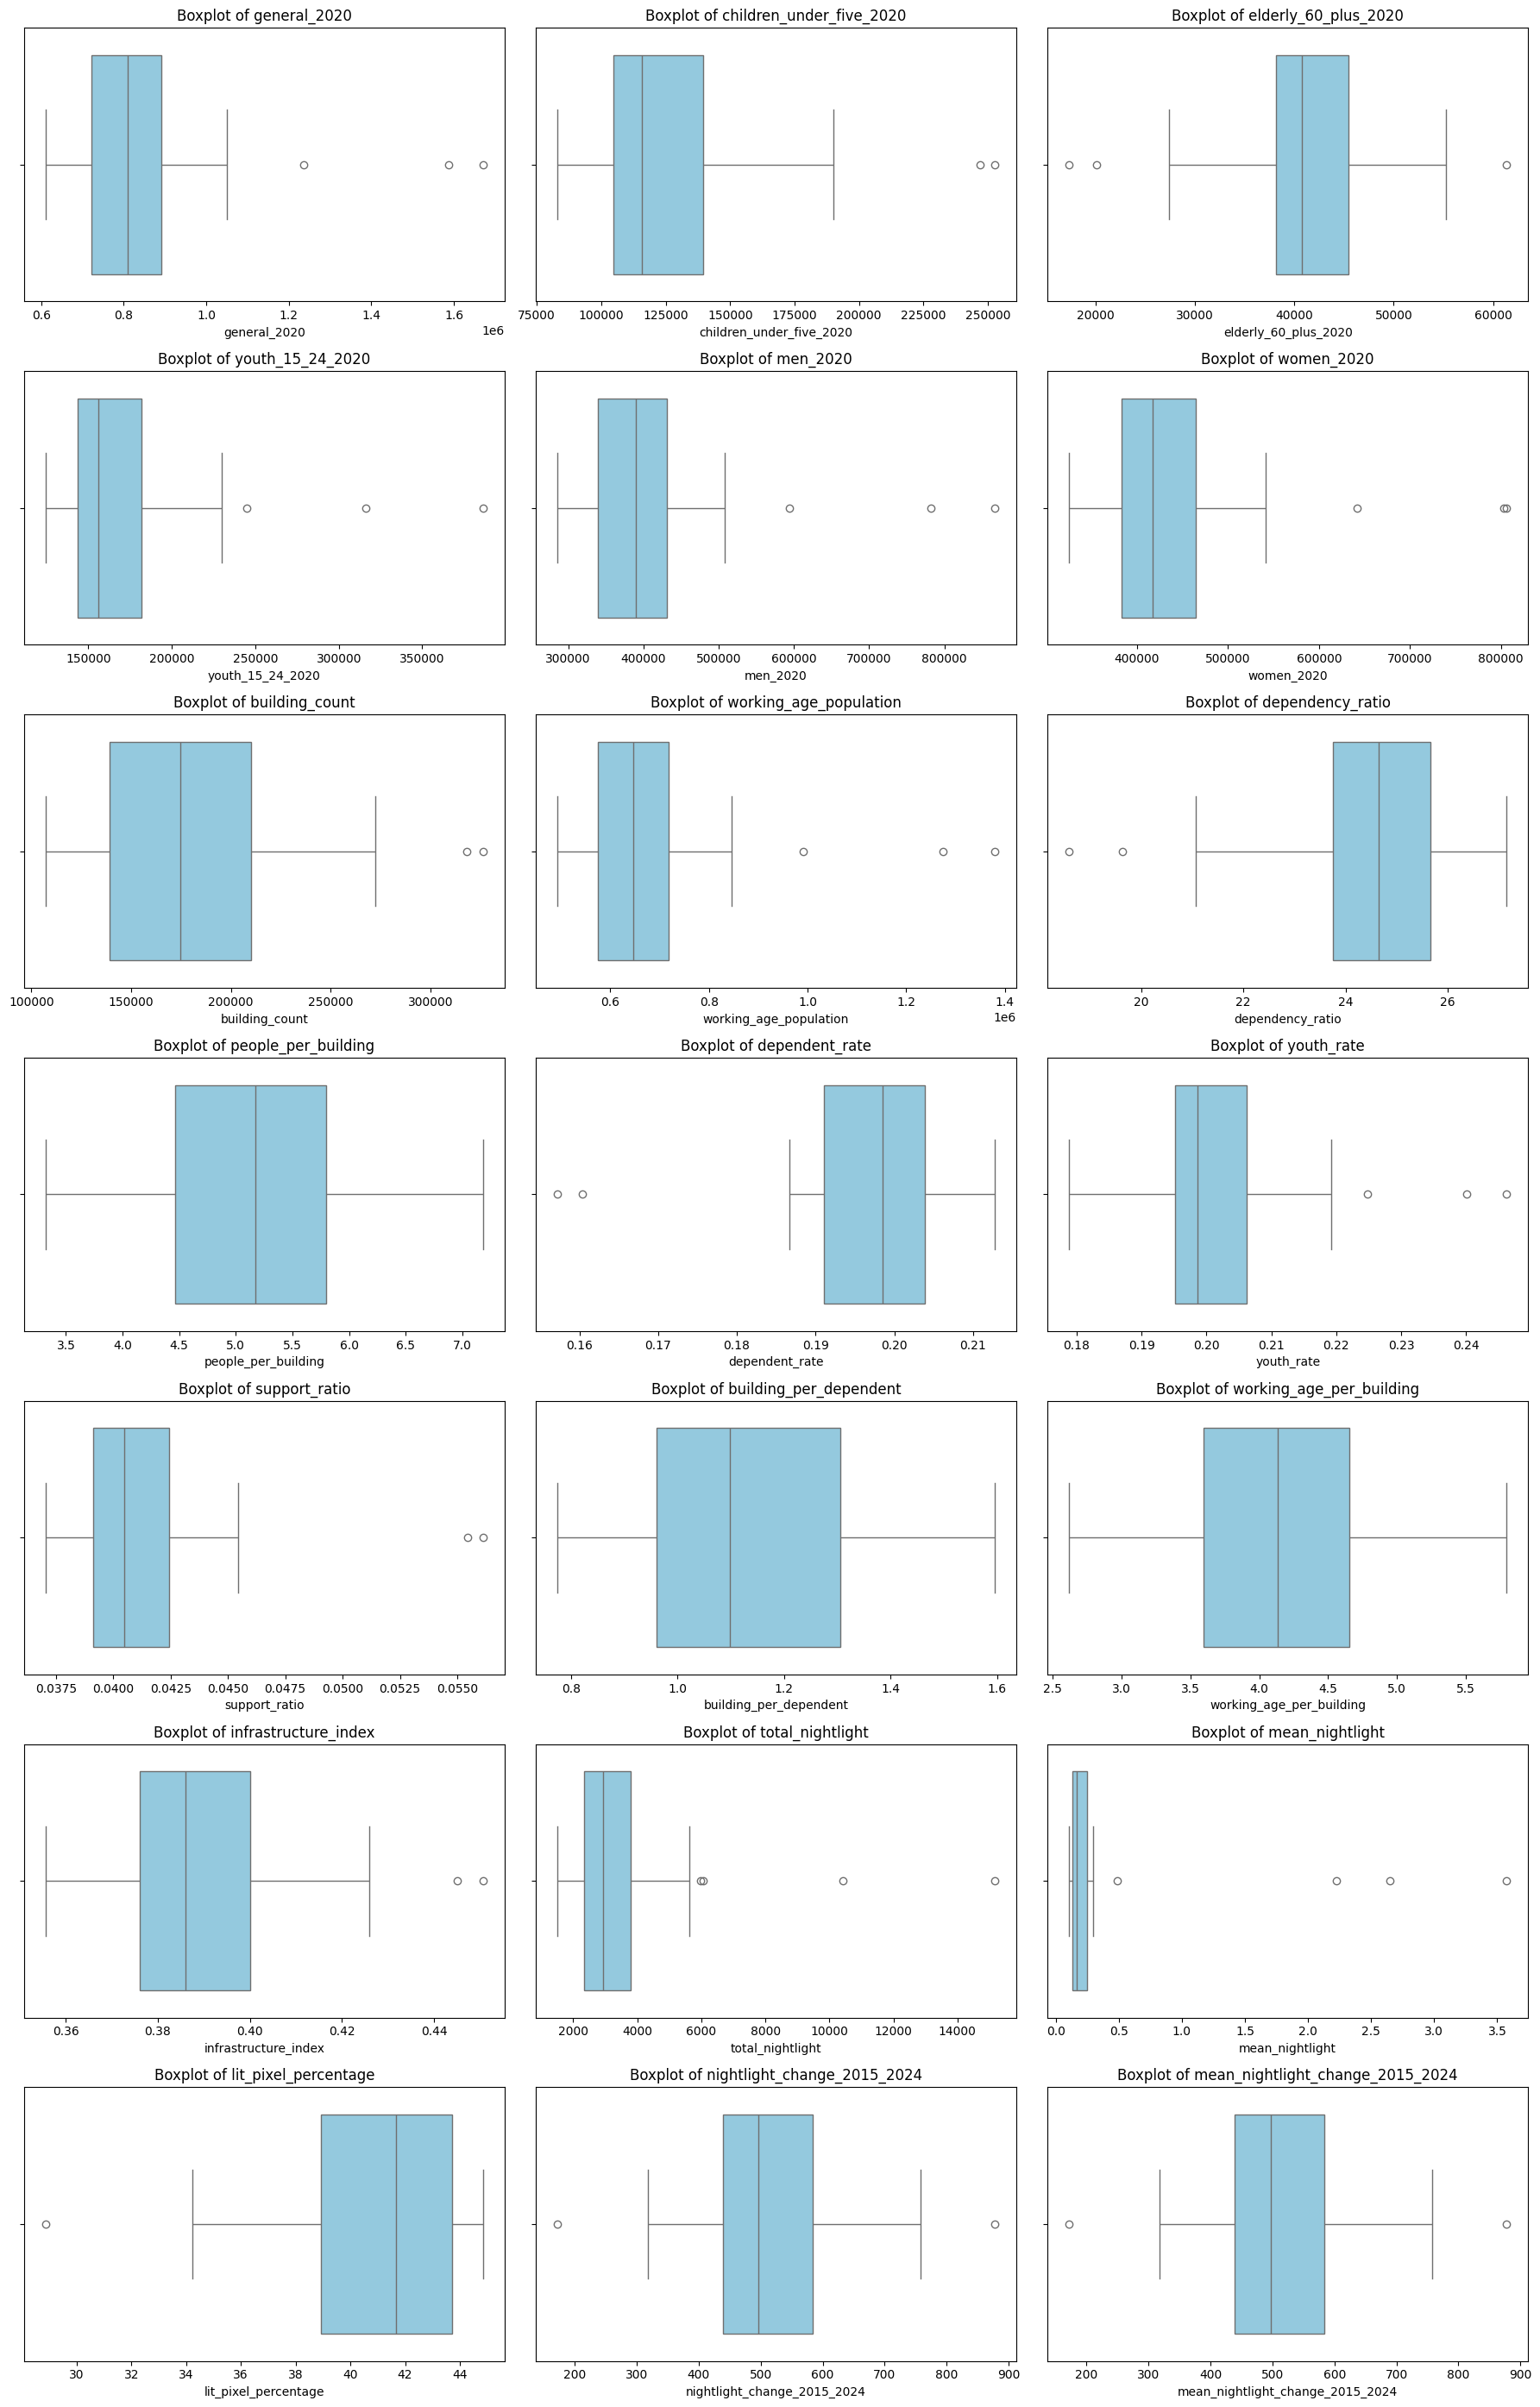

In [309]:
# Select numeric columns
numeric_cols = data.select_dtypes(include="number").columns
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
plt.figure(figsize=(n_cols * 6, n_rows * 4))

# Plot each boxplot in grid
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=data[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [297]:
# Identify outliers using IQR method
outliers_dict = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get the actual outlier values
    outliers = data[
        (data[col] < lower_bound) | (data[col] > upper_bound)
    ][col]

    outliers_dict[col] = outliers.tolist()

# Convert to DataFrame for better inspection
outliers_df = pd.DataFrame(
    [(col, val) for col, values in outliers_dict.items() for val in values],
    columns=["Column", "OutlierValue"],
)
outliers_df

,Column,OutlierValue
0,general_2020,1.670178e+06
1,general_2020,1.235875e+06
2,general_2020,1.588059e+06
3,children_under_five_2020,2.468837e+05
4,children_under_five_2020,2.526044e+05
5,elderly_60_plus_2020,2.010210e+04
6,elderly_60_plus_2020,6.133370e+04
7,elderly_60_plus_2020,1.739056e+04
8,youth_15_24_2020,3.862862e+05
9,youth_15_24_2020,2.450334e+05


In [300]:
data.shape

(30, 22)

In [ ]:
# for col in numeric_cols:
#     q1, q3 = data[col].quantile([0.25, 0.75])
#     iqr = q3 - q1
#     lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
#     data_no_outlier = data[
#         (data[col] >= lower) & (data[col] <= upper)
#     ]
# data_no_outlier.shape

(14, 22)

In [381]:
# #Winsorize outliers: Replace extreme values with the 1st or 99th percentile instead of dropping them.
# q_low = data[col].quantile(0.01)
# q_high = data[col].quantile(0.99)
# data[col] = data[col].clip(q_low, q_high)
# data

`Outliers were retained because they represent valid extreme values in the small dataset, and removing them would risk losing critical information.`

Document and justify your `infrastructure_index` methodology, explaining how `people_per_building` and other variables contribute to measuring infrastructure pressure.

##### Infrastructure Index Summary

The `infrastructure_index` measures how well an area’s infrastructure supports its population. Several key indicators were used to compute `infrastructure_index`:

- **People per building**:  higher values indicate more population.  
- **Dependency ratio**:  proportion of children and elderly per working age person.  
- **Support ratio** : working age population per dependent.  
- **Building per dependent** : availability of buildings for vulnerable (children and elderly) populations.  
- **Working age population per building**: distribution of working age people across buildings.  
- **Dependent (Vulnerable) and youth rates**:  proportion of children, elderly, and young people who increase service demand.

All variables are **normalized and combined into a single score**:

- **Close to 1** -> infrastructure is adequate.  
- **Close to 0** -> infrastructure is under pressure.

This index helps identify areas where **infrastructure improvements are most needed**.


# Part B: Exploratory Data Analysis


## Correlation Analysis:
1. **Correlation Heatmap**: Create a heatmap showing correlations between 10 key variables (mix of demographic, infrastructure, and nightlight variables). 

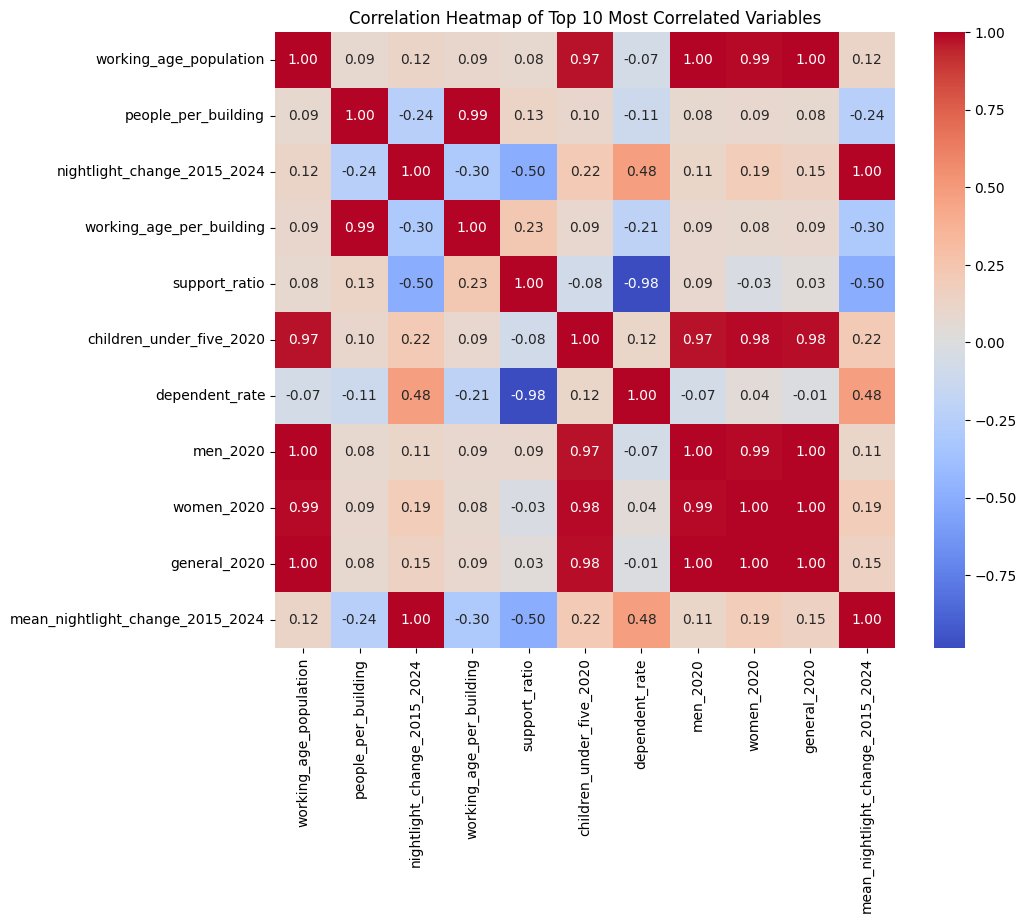

In [ ]:
# Compute correlation matrix
corr_matrix = data[numeric_cols].corr()

# Extract upper triangle to avoid duplicates
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Flatten and sort by absolute correlation to find strongest correlated pairs
corr_pairs = upper.unstack().dropna()
top_corr_vars = corr_pairs.abs().sort_values(ascending=False).head(10).index

# Extract unique variable names from top 10 pairs
top_vars = list(set([var for pair in top_corr_vars for var in pair]))
top_corr_matrix = data[top_vars].corr()
top_corr_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Top 10 Most Correlated Variables")
plt.show()

2. **Report the top 3 variable pairs** with the highest correlations and interpret their relationships.

| Variable Pair | Correlation | Interpretation |
|---------------|------------|----------------|
| working_age_population & men_2020 | 0.9985 | Most working age people are men |
| working_age_population & general_2020 | 0.9983 | Working age population is a large component of total population. |
| children_under_five_2020 & women_2020 | 0.9847 | Most young children are female population. |

3. **Identify unexpected correlations** and discuss potential explanations.

| Variable Pair | Correlation | Possible Explanation |
|---------------|------------|--------------------|
| nightlight_change_2015_2024 & people_per_building | -0.245 | Slight negative correlation: districts with higher population tend to have slightly lower nightlight growth. |
| nightlight_change_2015_2024 & support_ratio | -0.5026 | Districts with higher nightlight growth tend to have more working age population. |
| people_per_building & working_age_per_building | 0.9946 | Extremely high correlation; may indicate multicollinearity if used together in regression models. |

## Nightlight Trend Analysis:

1. **District Ranking**: Report the **top 5 districts** with the highest nightlight growth (2015-2024) and **bottom 5 districts** with the most decline or lowest growth.

In [316]:
# Top 5 growth districts
top5_growth = data.sort_values(
    "nightlight_change_2015_2024", ascending=False
).head(5)

# Bottom 5 growth districts
bottom5_growth = data.sort_values("nightlight_change_2015_2024").head(5)

print("Top 5 Districts (Nightlight Growth):")
print("="*35)
print(top5_growth[["district_name", "nightlight_change_2015_2024"]])
print("\nBottom 5 Districts (Nightlight Decline):")
print("=" * 40)
print(bottom5_growth[["district_name", "nightlight_change_2015_2024"]])

Top 5 Districts (Nightlight Growth):
   district_name  nightlight_change_2015_2024
23     Nyaruguru                   877.416033
18     Nyagatare                   757.478221
0       Bugesera                   716.347835
12        Kirehe                   639.036715
15         Ngoma                   623.507823

Bottom 5 Districts (Nightlight Decline):
   district_name  nightlight_change_2015_2024
22    Nyarugenge                   172.243930
24        Rubavu                   318.383571
11      Kicukiro                   387.778971
13       Muhanga                   390.763713
21        Nyanza                   399.027914


2. **Lit Pixel Analysis**: Compare these districts using `lit_pixel_percentage` changes to understand whether growth represents intensification or spatial expansion.

In [ ]:
# Compute column medians
lit_median = df_featured_cell_ntl['lit_pixel_percentage'].median()
nightlight_median = df_featured_cell_ntl['nightlight_change_2015_2024'].median()

def growth_type(row):
    if row["nightlight_change_2015_2024"] > nightlight_median:
        if row["lit_pixel_percentage"] > lit_median:
            return "Spatial Expansion"
        else:
            return "Intensification"
    else:
        return "Intensification"  # treat lower growth also as Intensification

# Compare lit_pixel_percentage changes
lit_comparison = pd.concat(
    [
        top5_growth[
            ["district_name", "nightlight_change_2015_2024", "lit_pixel_percentage"]
        ],
        bottom5_growth[
            ["district_name", "nightlight_change_2015_2024", "lit_pixel_percentage"]
        ],
    ]
)

lit_comparison['growth_type'] = lit_comparison.apply(growth_type, axis=1)
lit_comparison

,district_name,nightlight_change_2015_2024,lit_pixel_percentage,growth_type
23,Nyaruguru,877.416033,44.779355,Spatial Expansion
18,Nyagatare,757.478221,42.973761,Spatial Expansion
0,Bugesera,716.347835,43.883068,Spatial Expansion
12,Kirehe,639.036715,43.881016,Spatial Expansion
15,Ngoma,623.507823,42.634108,Spatial Expansion
22,Nyarugenge,172.243930,28.873768,Intensification
24,Rubavu,318.383571,38.488167,Intensification
11,Kicukiro,387.778971,34.229752,Intensification
13,Muhanga,390.763713,43.724362,Intensification
21,Nyanza,399.027914,44.464682,Intensification


3. **Create visualizations** showing nightlight trends for these extreme districts.

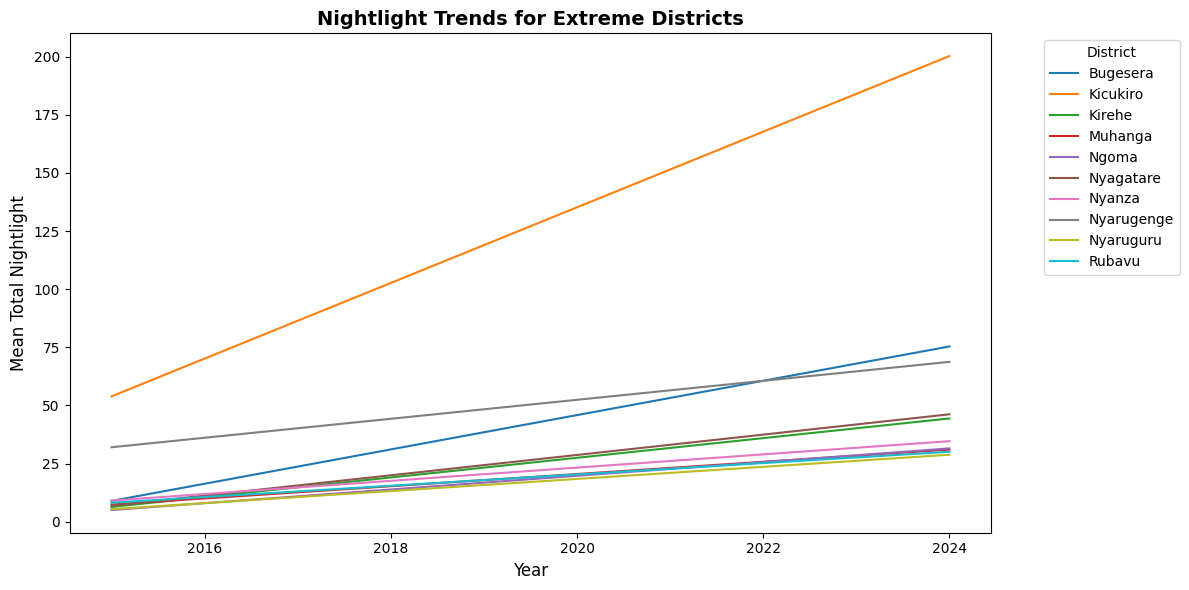

In [352]:
# Select extreme districts
lit_comparison = lit_comparison.sort_values("nightlight_change_2015_2024", ascending=False)
extreme_districts = lit_comparison["district_name"].unique()
df = (
    df_featured_cell_ntl[df_featured_cell_ntl["dist_name"].isin(extreme_districts)]
    .groupby(["dist_name", "year"])["total_nightlight"]
    .mean()
    .reset_index()
    .rename(columns={"total_nightlight": "mean_total_nightlight"})
)
plt.figure(figsize=(12, 6))
palette = sns.color_palette("tab10", len(extreme_districts))  # distinct, visible colors

sns.lineplot(
    data=df, x="year", y="mean_total_nightlight", hue="dist_name", palette=palette
)

plt.title("Nightlight Trends for Extreme Districts", fontsize=14, weight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Total Nightlight", fontsize=12)
plt.legend(
    title="District", bbox_to_anchor=(1.05, 1), loc="upper left"
)  # move legend outside
plt.tight_layout()
plt.show()

/tmp/ipykernel_70424/2457768708.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


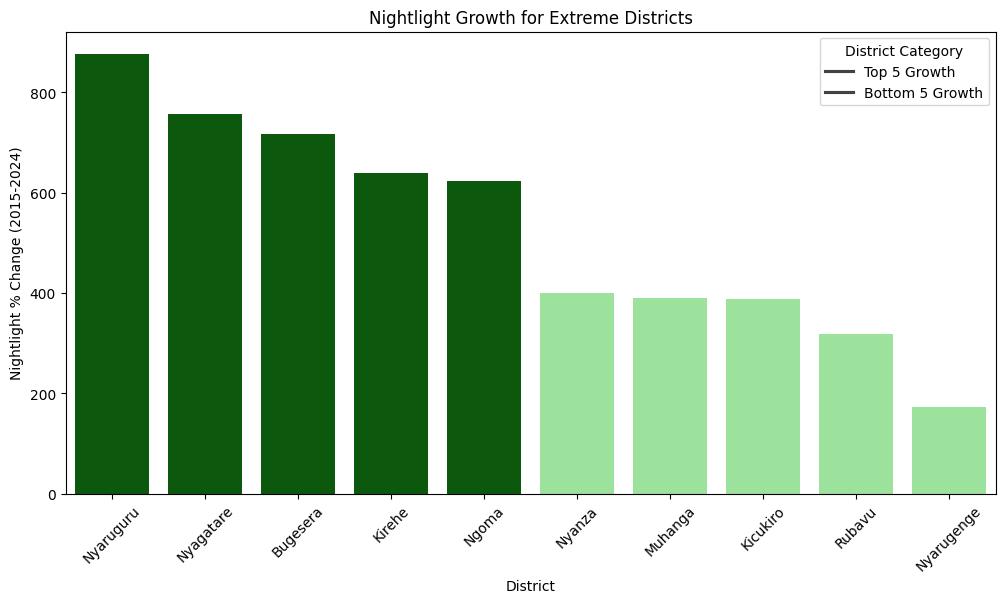

In [355]:
# Combine top and bottom districts
extreme_districts = pd.concat([top5_growth, bottom5_growth]).sort_values(
    "nightlight_change_2015_2024", ascending=False
)

# Assign colors: darker green for top5, lighter green for bottom5
colors = [
    "darkgreen" if i < len(top5_growth) else "lightgreen"
    for i in range(len(extreme_districts))
]

plt.figure(figsize=(12, 6))
sns.barplot(
    x="district_name",
    y="nightlight_change_2015_2024",
    data=extreme_districts,
    palette=colors,
)
plt.xticks(rotation=45)
plt.legend(
    labels=["Top 5 Growth", "Bottom 5 Growth"],
    loc="upper right",
    title="District Category",
)
plt.xlabel("District")
plt.ylabel("Nightlight % Change (2015-2024)")
plt.title("Nightlight Growth for Extreme Districts")
plt.show()

# Part C: Predictive Modeling and Strategic Analysis

## Multivariate Linear Regression:

1. **Model Development**: Build a multivariate linear regression model predicting **population density** using both demographic and nightlight variables as predictors.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select all numeric columns
numeric_cols = data.select_dtypes(include="number").columns
# Define target and predictors
target = "general_2020"  # your population proxy
X = data.loc[:, numeric_cols.drop(target)]
y = data.loc[:, target]

# Add constant
X_const = sm.add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])
]

print(vif_data)

                            Variable           VIF
0                              const  0.000000e+00
1           children_under_five_2020  1.705909e+13
2               elderly_60_plus_2020  7.589484e+11
3                   youth_15_24_2020  8.894866e+03
4                           men_2020  1.476590e+14
5                         women_2020  1.324588e+14
6                     building_count  9.514123e+01
7             working_age_population  1.732154e+14
8                   dependency_ratio  7.520317e+02
9                people_per_building  9.007199e+15
10                    dependent_rate  4.503600e+15
11                        youth_rate  6.433714e+14
12                     support_ratio  4.289143e+13
13            building_per_dependent  2.303632e+13
14          working_age_per_building  8.660769e+13
15              infrastructure_index  7.970973e+13
16                  total_nightlight  5.226313e+01
17                   mean_nightlight  4.922768e+02
18              lit_pixel_perce

/home/ira2351696/Desktop/airflow_environment/venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
predictors = [
    "building_count",
    "people_per_building",
    "dependency_ratio",
    "dependent_rate",
    "youth_rate",
    "support_ratio",
    "building_per_dependent",
    "working_age_per_building",
    "infrastructure_index",
    "total_nightlight",
    "mean_nightlight",
    "lit_pixel_percentage",
    "nightlight_change_2015_2024",
    "mean_nightlight_change_2015_2024",
]
X = data[predictors]
y = data["general_2020"]

# Add constant for statsmodels
X_const = sm.add_constant(X)

# Fit OLS regression
model = sm.OLS(y, X_const).fit()
print(model.summary())
print(f"R-squared: {model.rsquared:.3f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.3f}")
print(f"F-statistic p-value: {model.f_pvalue:.4f}")

print("\nKey Coefficients:")
coeffs = model.params
pvals = model.pvalues
for var in coeffs.keys():
    print(f"{var}: {coeffs[var]:.3f} (p={pvals[var]:.4f})")

print(f"\nModel Summary:")
print(f"  Variables: {len(model.params)} coefficients")
print(f"  Significant predictors: {sum(model.pvalues < 0.05)} at α=0.05")

                            OLS Regression Results                            
Dep. Variable:           general_2020   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     21.38
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           1.17e-07
Time:                        21:22:01   Log-Likelihood:                -370.88
No. Observations:                  30   AIC:                             769.8
Df Residuals:                      16   BIC:                             789.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

2. **Variable Selection**: Test different combinations of variables and report the **top 3 most predictive variables** of population density.


/tmp/ipykernel_70424/2226902769.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, palette="viridis")


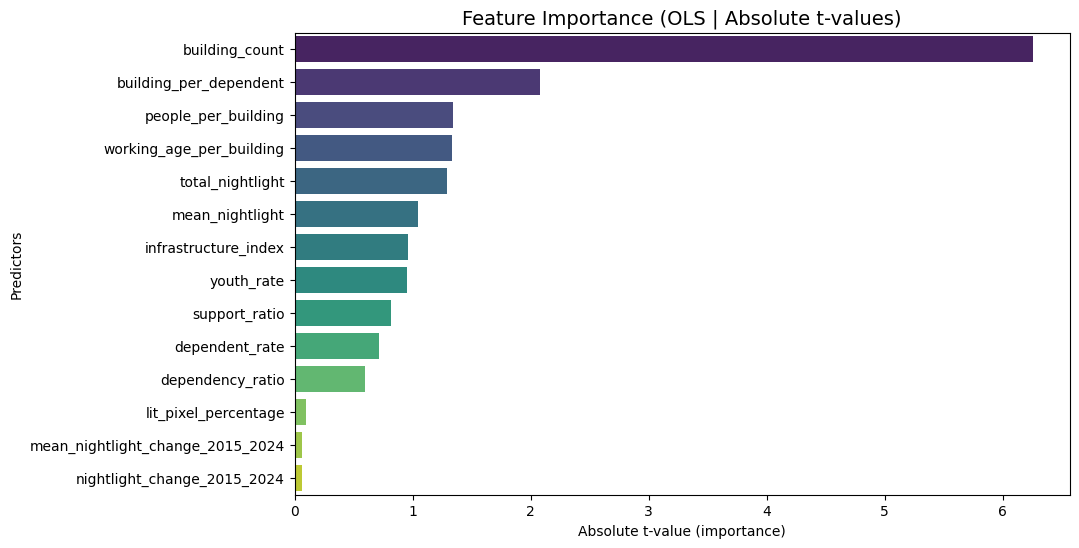

Top 3 most predictive variables: ['building_count', 'building_per_dependent', 'people_per_building']


In [ ]:
# Get feature importance via absolute t-values
importance = model.tvalues.drop("const").abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index, palette="viridis")
plt.title("Feature Importance (OLS | Absolute t-values)", fontsize=14)
plt.xlabel("Absolute t-value (importance)")
plt.ylabel("Predictors")
plt.show()

# Report top 3 most predictive
top3 = importance.head(3).index.tolist()
print("Top 3 most predictive variables:", top3)

3. **Model Evaluation**: Report R-squared, coefficients, and statistical significance. Interpret what these results tell us about population infrastructure relationships.

#### Model Performance
- **R-squared**: **0.946** -> The model explains ~95% of the variation in population density.  
- **Adjusted R-squared**: **0.901** -> After adjusting for predictors, ~90% of variation is still explained.  
- **F-statistic (p < 0.001)** -> The overall regression model is highly significant.  

#### Key Coefficients (Top Predictors)

| Variable               | Coefficient | p-value | Interpretation |
|------------------------|-------------|---------|----------------|
| **Building Count**     | **+4.92**   | **0.000** | Strong, significant positive relationship: more buildings strongly predict higher population density. |
| Building per Dependent | -1.44e+06   | 0.054   | Nearly significant (alpha=0.05): districts with fewer dependents per building tend to have higher population density. |
| Total Nightlight       | +32.75      | 0.215   | Positive but not statistically significant, nightlights are weakly associated with higher population. |

## Interpretation
- **Buildings are the strongest predictor** of population density, this show the direct link between infrastructure and population growth.  
- **Demographic ratios (dependency, support, youth rate)** were **not statistically significant**, means that they alone do not strongly explain variation in population density.  
- **Nightlight intensity contributes positively**, but its effect is not strong enough compared to building counts.  

In [365]:
predictors_refined = [
    "building_count",
    "people_per_building",
    "infrastructure_index",
    "total_nightlight",
    "mean_nightlight",
    "lit_pixel_percentage",
    "building_per_dependent",
]

X_refined = data[predictors_refined]
X_refined_const = sm.add_constant(X_refined)

model_refined = sm.OLS(y, X_refined_const).fit()
print(model_refined.summary())

                            OLS Regression Results                            
Dep. Variable:           general_2020   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     34.22
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           2.13e-10
Time:                        21:08:15   Log-Likelihood:                -377.41
No. Observations:                  30   AIC:                             770.8
Df Residuals:                      22   BIC:                             782.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.25

/tmp/ipykernel_70424/1132845920.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, palette="viridis")


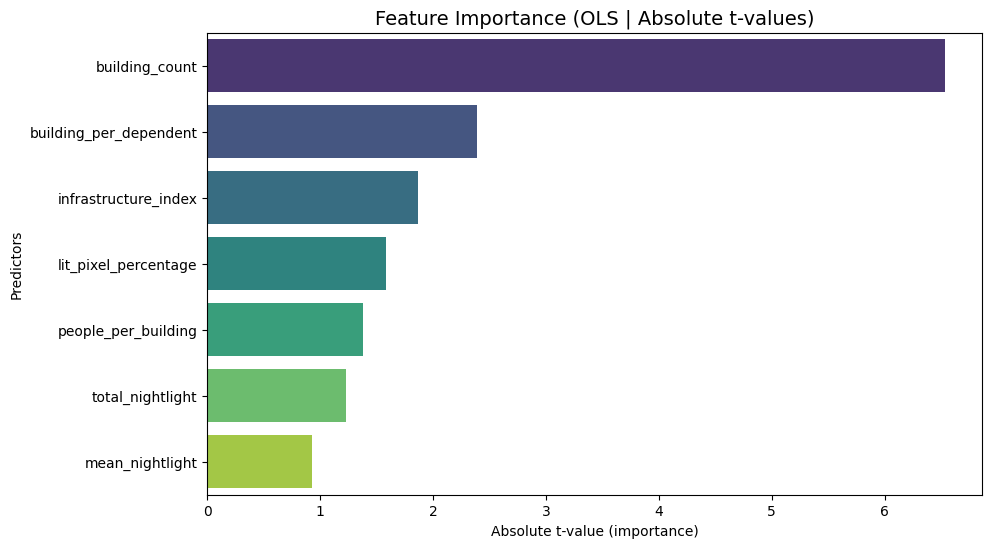

Top 3 most predictive variables: ['building_count', 'building_per_dependent', 'infrastructure_index']


In [375]:
# Get feature importance via absolute t-values
importance = model_refined.tvalues.drop("const").abs().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index, palette="viridis")
plt.title("Feature Importance (OLS | Absolute t-values)", fontsize=14)
plt.xlabel("Absolute t-value (importance)")
plt.ylabel("Predictors")
plt.show()

# Report top 3 most predictive
top3 = importance.head(3).index.tolist()
print("Top 3 most predictive variables:", top3)

### Model Performance with different predictors
- **R-squared**: **0.916** ->>> The model explains ~92% of the variation in population density.  
- **Adjusted R-squared**: **0.889** ->>> After adjusting for predictors, ~89% of variation is still explained.  
- `We choose the above first model since it have high R-squared`

### Strategic Development Framework:
Based on your regression results and EDA findings:
- **High-Priority Districts**: Identify districts that are **under-predicted** by your model (high actual population but low predicted population) - these may represent infrastructure gaps.

In [376]:
# Predict population using your fitted model
data["predicted_population"] = model.predict(X_const)

# Calculate prediction error (actual - predicted)
data["prediction_error"] = data["general_2020"] - data["predicted_population"]

# Identify districts where the model under-predicts population
high_priority_districts = data.nlargest(5, "prediction_error")[
    ["district_name", "general_2020", "predicted_population", "prediction_error"]
]

# Display the top 5 under-predicted districts
print(high_priority_districts)

   district_name  general_2020  predicted_population  prediction_error
1         Burera  6.958934e+05          5.796014e+05     116292.011249
18     Nyagatare  1.588059e+06          1.503746e+06      84312.992643
3         Gasabo  1.670178e+06          1.591856e+06      78322.130379
26       Rulindo  6.219024e+05          5.576532e+05      64249.156207
6       Gisagara  7.333018e+05          6.712648e+05      62036.939850


- **Development Recommendations**: Which districts should receive immediate infrastructure investment based on your analysis?

**Interpretation:** `Burera, Nyagatare, Gasabo, Rulindo, and Gisagara have higher population densities than expected given their current infrastructure, building, and nightlight intensity.`

**Recommendations:** `These districts should be prioritized for infrastructure development. Investments in housing, utilities, and public services will help close the gap between actual population and existing infrastructure, ensuring equitable access to essential resources`

- **Evidence-Based Justification**: Use statistical evidence from your regression model and correlation analysis to support your recommendations.

### Regression Insights
- The **OLS regression model** predicts population (`general_2020`) using demographic and infrastructure variables.
- **Model performance:**
  - R-squared = 0.946 -> the model explains ~95% of population variation.
  - Adjusted R-squared = 0.901 -> accounting for number of predictors.
- **Key predictor:**  
  - **Building Count** is the most significant predictor (coef = +4.92, p < 0.001), indicating that population density is strongly linked to infrastructure availability.
  - **Other variables** (dependency ratios, nightlight metrics) are less significant but contribute to model fit.

#### Correlation Analysis Highlights
- Strong correlations between **population-related variables** ( `general_2020`, `men_2020`, `women_2020`, `working_age_population`) confirm that population is concentrated in districts with more adults and working age residents.
- Infrastructure variables, such as `building_count` and `people_per_building`, show moderate positive correlations with population, reinforcing the importance of physical infrastructure.


#### Recommendation Justification
**Infrastructure priority:** Burera and Nyagatare should be first targets due to largest population infrastructure gaps.  
**Resource allocation rationale:** Regression evidence shows **population is highly sensitive to building count**, and correlation analysis confirms infrastructure and population metrics are positively correlated.  
**Actionable insight:** Investments in housing, utilities and public services will improve population accommodation and district development.

**Conclusion:** Using model predictions, significant regression coefficients, and population infrastructure correlations, these districts are identified as high priority for infrastructure development.
